In [3]:
import tensorflow as tf

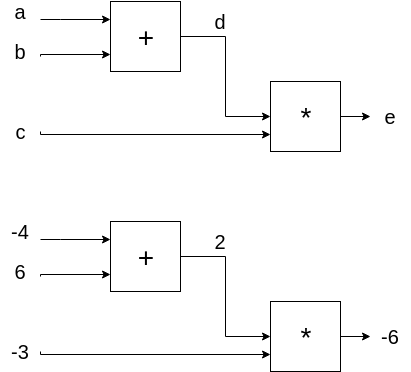

In [17]:
# with tf.Graph.g as g:
a = tf.constant(-4.0, name='a')
b = tf.constant(6.0, name='b')
c = tf.constant(-3.0,name='c')
d = a + b
e = c*d
de_da = tf.gradients(e, a)
de_db = tf.gradients(e, b)
de_dc = tf.gradients(e, c)
with tf.Session() as sess:
    print(sess.run([de_da, de_db, de_dc]))

[[-3.0], [-3.0], [2.0]]


In [18]:
de_dd_manual = c
de_da_manual = de_dd_manual * 1
de_db_manual = de_dd_manual * 1
de_dc_manual = d
with tf.Session() as sess:
    print(sess.run([de_da_manual, de_db_manual, de_dc_manual]))

[-3.0, -3.0, 2.0]


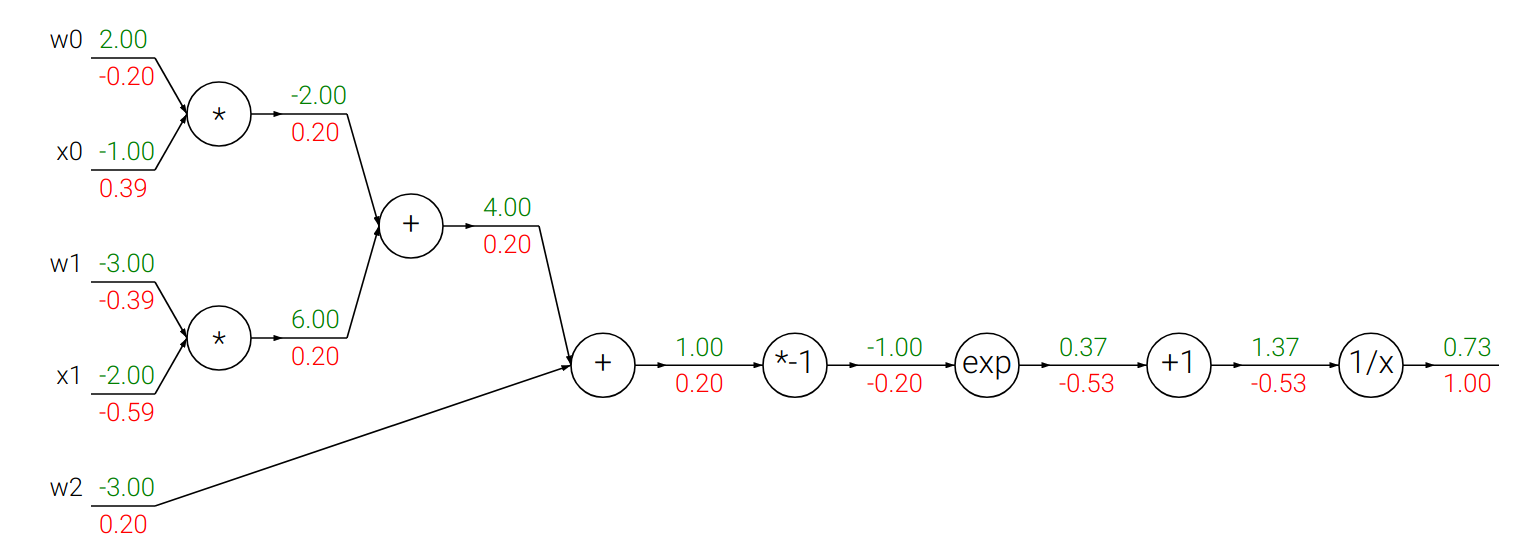

In [35]:
# with tf.Graph.g as g:
w0 = tf.constant(2.0, name='a')
x0 = tf.constant(-1.0, name='b')
w1 = tf.constant(-3.0)
x1 = tf.constant(-2.0)
w2 = tf.constant(-3.0)

a = w0*x0 
b = w1*x1
c = a + b
d = c + w2
e = d * -1
f = tf.exp(e)
g = f + 1
h = 1/g

with tf.Session() as sess:
    print(sess.run([a, b, c, d, e, f, g , h]))

dh_dg = tf.gradients(h, g)
dh_df = tf.gradients(h, f)
dh_de = tf.gradients(h, e)
dh_dd = tf.gradients(h, d)
dh_dc = tf.gradients(h, c)
dh_db = tf.gradients(h, b)
dh_da = tf.gradients(h, a)
dh_dw0 = tf.gradients(h, w0)
dh_dx0 = tf.gradients(h, x0)
dh_dw1 = tf.gradients(h, w1)
dh_dx1 = tf.gradients(h, x1)
dh_dw2 = tf.gradients(h, w2)

with tf.Session() as sess:
    print(sess.run([dh_dg, dh_df, dh_de, dh_dd, dh_dc, dh_db, dh_da]))
    print(sess.run([dh_dw0, dh_dx0, dh_dw1, dh_dx1, dh_dw2]))

[-2.0, 6.0, 4.0, 1.0, -1.0, 0.36787945, 1.3678794, 0.7310586]
[[-0.53444666], [-0.53444666], [-0.19661194], [0.19661194], [0.19661194], [0.19661194], [0.19661194]]
[[-0.19661194], [0.39322388], [-0.39322388], [-0.5898358], [0.19661194]]


In [36]:
dh_dg_manual = -1/(g*g)
dg_df_manual = 1
df_de_manual = tf.exp(e)
de_dd_manual = -1
dd_dc_manual = 1
dc_da_manual = 1
dc_db_manual = 1

dd_dw2_manual = 1
db_dw1_manual = x1
da_dw0_manual = x0

db_dx1_manual = w1
da_dx0_manual = w0

dh_df_manual = dh_dg_manual * dg_df_manual
dh_de_manual = dh_df_manual * df_de_manual
dh_dd_manual = dh_de_manual * de_dd_manual
dh_dc_manual = dh_dd_manual * dd_dc_manual
dh_db_manual = dh_dc_manual * dc_db_manual
dh_da_manual = dh_dc_manual * dc_da_manual

dh_dw2_manual = dh_dd_manual * dd_dw2_manual
dh_dw1_manual = dh_db_manual * db_dw1_manual
dh_dw0_manual = dh_da_manual * da_dw0_manual

dh_dx1_manual = dh_db_manual * db_dx1_manual
dh_dx0_manual = dh_da_manual * da_dx0_manual

with tf.Session() as sess:
    print(sess.run([dh_dg_manual, dh_df_manual, dh_de_manual, dh_dd_manual, dh_dc_manual, dh_db_manual, dh_da_manual]))
    print(sess.run([dh_dw0_manual, dh_dx0_manual, dh_dw1_manual, dh_dx1_manual, dh_dw2_manual]))

[-0.5344467, -0.5344467, -0.19661197, 0.19661197, 0.19661197, 0.19661197, 0.19661197]
[-0.19661197, 0.39322394, -0.39322394, -0.5898359, 0.19661197]
